In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [2]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={
        'map_name': '4x4',
        'is_slippery': True
    }
)

In [3]:
env = gym.make('FrozenLake-v3')

In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [5]:
learning_rate = .88
dis = .99
num_episodes = 2000
rList = []

In [6]:
for i in range(num_episodes):
    state, _ = env.reset()
    rAll = 0
    done = False

    e = 1. / ((i//100) + 1)

    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n) / (i+1))

        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])

        new_state, reward, done, truncated, info = env.step(action)

        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state,:]))

        rAll += reward
        state = new_state

    rList.append(rAll)

/opt/anaconda3/envs/gym/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Score over time: 0.1645


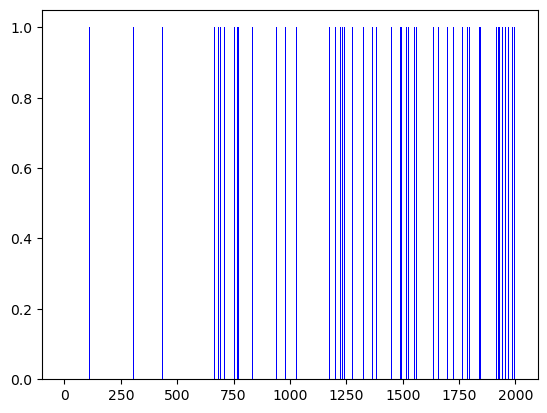

In [7]:
print("Score over time: " + str(sum(rList)/num_episodes))
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

In [8]:
print("Final Q-Table Values")
print(Q)

Final Q-Table Values
[[4.10372734e-01 3.78494483e-01 5.62372949e-01 3.54030787e-01]
 [8.04111796e-03 9.08572080e-02 8.69640911e-03 5.78127704e-01]
 [6.57678322e-02 9.61320381e-02 2.86841614e-01 3.41014327e-01]
 [4.67362741e-02 4.31152920e-02 1.19083046e-04 2.85247711e-01]
 [4.84572047e-01 9.18962947e-02 1.67684463e-02 8.18322336e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.05921035e-03 3.87266791e-10 1.91607737e-02 4.93221394e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.35307955e-02 1.02582263e-01 1.12644919e-01 3.75548823e-01]
 [1.09428077e-01 8.05394954e-01 1.19260006e-01 1.03784630e-01]
 [1.61047655e-01 3.02645618e-03 1.33378864e-01 1.28747708e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.80097331e-02 1.43862153e-01 7.68278665e-01 1.36295555e-02]
 [5.10077303e-01 9.65471028e-01 5.22831404e-01 4.56274795e-01]
 [0.00000000e+00 0.00000000e+00 0.